In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
import numpy as np

In [5]:
train_dir = "Desktop/Beans_FCMB/train"
val_dir = "Desktop/Beans_FCMB/val"
test_dir = "Desktop/Beans_FCMB/test"

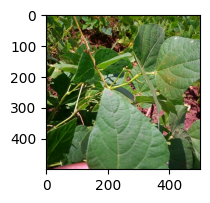

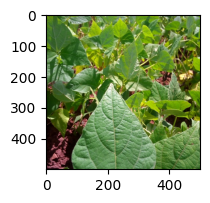

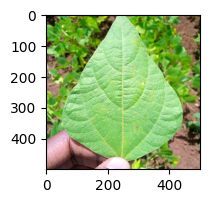

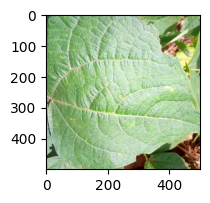

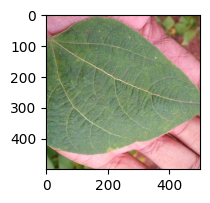

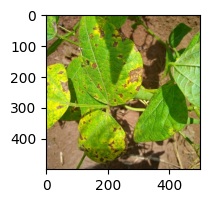

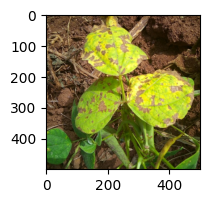

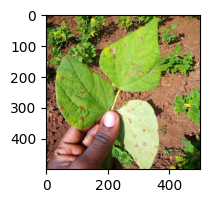

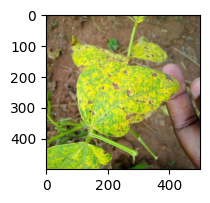

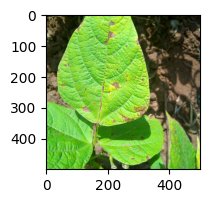

In [6]:
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    image_count = 0
    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path,file)
        plt.figure(figsize=(2, 2))
        plt.imshow(plt.imread(image_path))
        plt.show()
        image_count += 1
        if image_count == 5:
            break

In [7]:
class_labels = [entry for entry in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, entry))]


print("Class Labels:")
for label in class_labels:
    label_path = os.path.join(train_dir, label)
    num_contents = len(os.listdir(label_path))
    print(f"{label}: {num_contents} items")

Class Labels:
healthy: 296 items
unhealthy: 340 items


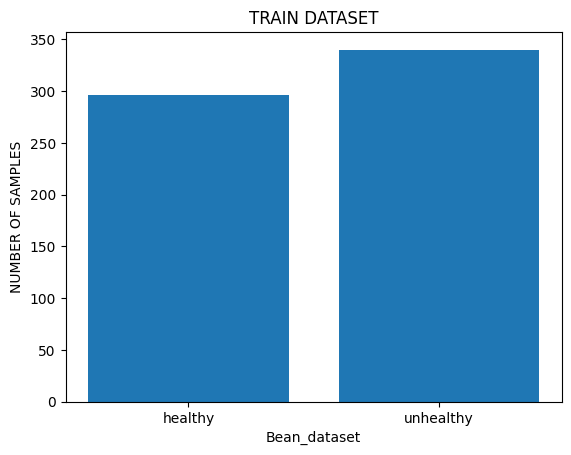

In [8]:
train_image_count_dict = {}

for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    train_image_count = 0
    for file in os.listdir(folder_path):
        train_image_count += 1
    train_image_count_dict[folder] = train_image_count
train_subfolders = list(train_image_count_dict.keys())
train_image_counts = list(train_image_count_dict.values())
plt.bar(train_subfolders, train_image_counts)
plt.xlabel('Bean_dataset')
plt.ylabel('NUMBER OF SAMPLES')
plt.title('TRAIN DATASET')
plt.show()

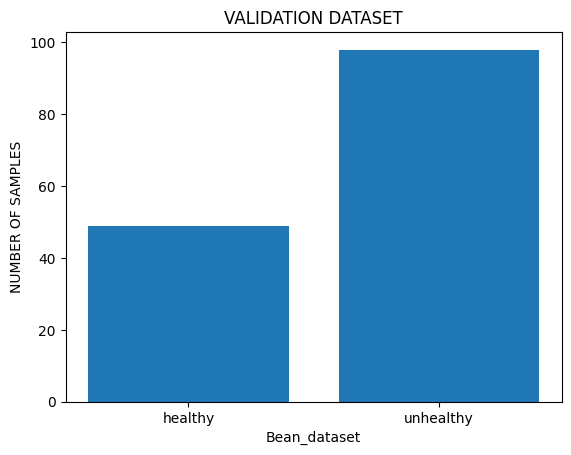

In [9]:
val_image_count_dict = {}

for folder in os.listdir(val_dir):
    folder_path = os.path.join(val_dir, folder)
    val_image_count = 0
    for file in os.listdir(folder_path):
        val_image_count += 1
    val_image_count_dict[folder] = val_image_count
val_subfolders = list(val_image_count_dict.keys())
val_image_counts = list(val_image_count_dict.values())
plt.bar(val_subfolders, val_image_counts)
plt.xlabel('Bean_dataset')
plt.ylabel('NUMBER OF SAMPLES')
plt.title('VALIDATION DATASET')
plt.show()

In [10]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          width_shift_range = 20,
                                                          height_shift_range = 20,
                                                          rotation_range = 20,
                                                          horizontal_flip = True,
                                                          vertical_flip = True,
                                                          shear_range = 0.2,
                                                          zoom_range = 0.2
    )
data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [11]:
train_dataset = data_aug.flow_from_directory(train_dir,
                                            subset = 'training',
                                            target_size = (224,224),
                                            seed = 42,
                                            batch_size = 32)
val_dataset = data.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       batch_size = 32,
                                       seed = 42)
test_dataset = data.flow_from_directory(test_dir,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        seed = 42)

Found 636 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [12]:
img_size = (224,224)
img_shape = img_size + (3,)
mobilenet = tf.keras.applications.MobileNetV2(input_shape = img_shape,
                                            include_top = False,
                                            weights = 'imagenet')

In [13]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [14]:
mobilenet.trainable = False
mobilenet.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128, 'relu'))
model.add(Dense(64, 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, 'sigmoid'))

In [17]:
model.compile(optimizer = 'Adam',
              loss = 'BinaryCrossentropy',
             metrics = ['accuracy'])

In [18]:
model.fit(train_dataset, validation_data = val_dataset, epochs = 30)

Epoch 1/30


C:\Users\HP\anaconda3\envs\ultralytics\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.6514 - loss: 0.6885 - val_accuracy: 0.8980 - val_loss: 0.2707
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9133 - loss: 0.2396 - val_accuracy: 0.9796 - val_loss: 0.1164
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9391 - loss: 0.1720 - val_accuracy: 0.9796 - val_loss: 0.0707
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9526 - loss: 0.1475 - val_accuracy: 0.9864 - val_loss: 0.0486
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9660 - loss: 0.0939 - val_accuracy: 0.9864 - val_loss: 0.0431
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9380 - loss: 0.1338 - val_accuracy: 0.9796 - val_loss: 0.0522
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9584 - loss: 0.1042 - val_accuracy: 0.9932 - val_loss: 0.0404
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9800 - loss: 0.0672 - val_accuracy: 0.9932 - val_loss: 0.0419
Ep

In [19]:
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis = 1)
print(predicted_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 46s 46s/step


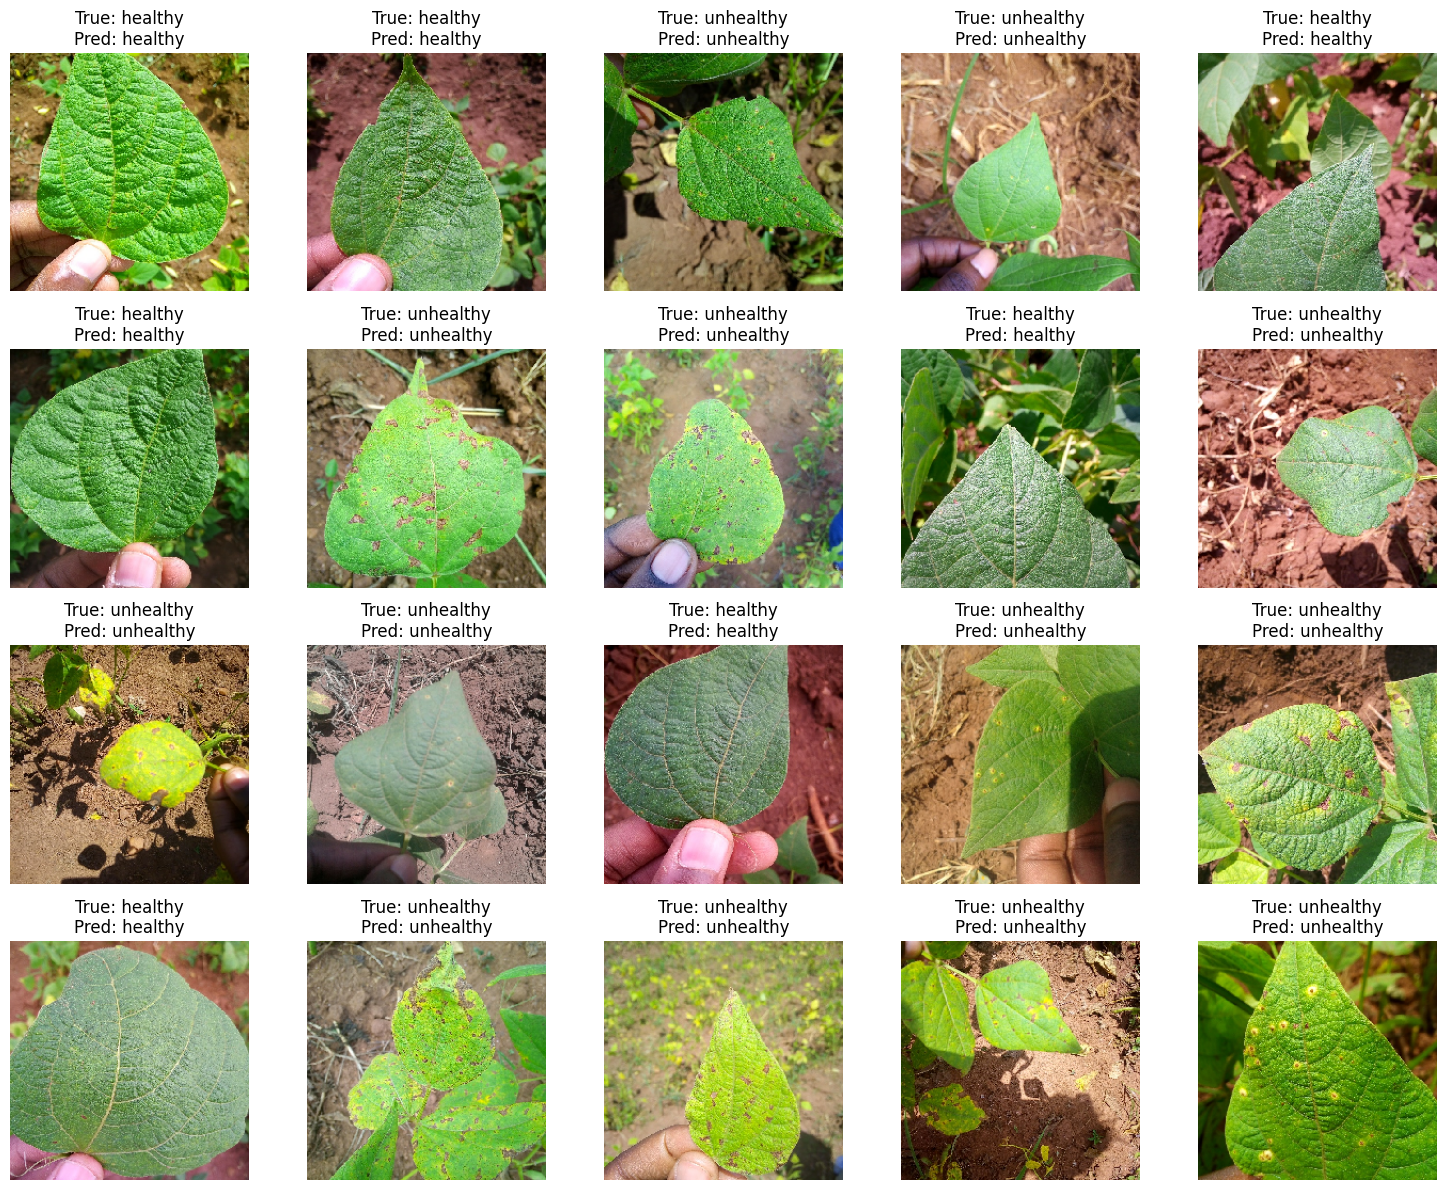

In [21]:
class_labels = list(val_dataset.class_indices.keys())  

num_images_to_display = 20


for batch in test_dataset:
    images, true_labels = batch  
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(true_labels, axis=1)  


    num_images = min(num_images_to_display, len(images))
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12)) 
    axes = axes.flatten()  

    for i in range(num_images):
        ax = axes[i]
        single_image = images[i]
        

        if isinstance(single_image, np.ndarray) and single_image.ndim == 3:
            ax.imshow(single_image)
        else:

            ax.imshow(single_image.numpy())
        
        predicted_label = class_labels[predicted_labels[i]]
        true_label = class_labels[true_labels[i]]
        
        ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
        ax.axis('off')  


    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    

    break


In [22]:
import pickle

with open('Beans_Health.pkl', 'wb') as file:
    pickle.dump(model, file)
